# Problem

Suppose you are the CEO of a Food Trucks franchise. You are considering different cities to open a new point of sale. The chain already has trucks in different cities and you have data for the city's profits and populations.
You want to use this data to help you choose the city to open a new point of sale.

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [425]:
dataset = pd.read_csv('univariate_linear_regression_dataset.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, -1].values

In [426]:
dataset

,pop,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


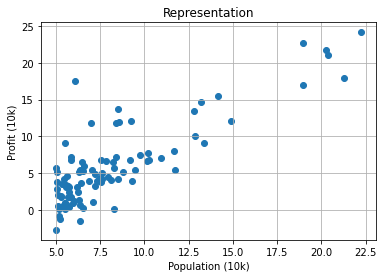

In [427]:
axes = plt.axes()
axes.grid()
plt.title("Representation")
plt.scatter(X, y)
plt.xlabel("Population (10k)")
plt.ylabel("Profit (10k)")
plt.show()

# Linear Regression Model

In [428]:
def linearRegression(X, y):
  # Scipy Regression
  from scipy import stats
  slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
  def predict(X):
    return slope * X + intercept
  axes = plt.axes()
  axes.grid()
  plt.title(" Scipy Predictions")
  plt.plot(X, predict(X), c='r')
  plt.scatter(X, y, c='b')
  plt.xlabel('Population (10k)')
  plt.ylabel('Profit (10k)')
  plt.xlim((4.5, 22.5))
  plt.ylim((-5, 25))
  plt.show()
  # Scikit Learn Regression
  from sklearn.model_selection import train_test_split
  X = X.reshape(X.shape[0], 1)
  y = y.reshape(y.shape[0], 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  axes = plt.axes()
  axes.grid()
  plt.scatter(X_train, y_train, color='blue')
  plt.plot(X_train, regressor.predict(X_train), color='red')
  plt.title("SKL Regression - Train set")
  plt.xlabel("Population (10k)")
  plt.ylabel('Profit (10k)')
  plt.show()
  axes = plt.axes()
  axes.grid()
  plt.scatter(X_test, y_test, color='blue')
  plt.plot(X_test, y_pred, color='red')
  plt.title("SKL Regression - Test set")
  plt.xlabel("Population (10k)")
  plt.ylabel('Profit (10k)')
  plt.show()
  # compare scipy and sklearn
  axes = plt.axes()
  axes.grid()
  plt.title('Scipy vs Sklearn results')
  plt.plot(X_test, y_pred, c='b', label="sklearn")
  plt.plot(X_test, predict(X_test), c='r', label="scipy")
  plt.xlabel("Population (10k)")
  plt.ylabel('Profit (10k)')
  plt.legend(loc="lower right")
  plt.show()
  # r2 scores
  from sklearn.metrics import r2_score
  print("Scipy: "+str(r_value))
  print("SKLearn: "+str(r2_score(y_train, regressor.predict(X_train))))
  # random predictions
  angers = np.array([15])
  angers = angers.reshape(angers.shape[0], 1)
  print("150K (Angers)")
  print("Scipy: ["+str(predict(15))+"]")
  print("SkLearn: "+str(regressor.predict(angers).reshape(1,)))
  print("Delta = "+str(np.abs(predict(15)-regressor.predict(angers).reshape(1,))))
  rennes = np.array([21])
  rennes = rennes.reshape(rennes.shape[0], 1)
  print("215K (Rennes)")
  print("Scipy: ["+str(predict(21))+"]")
  print("SkLearn: "+str(regressor.predict(rennes).reshape(1,)))
  print("Delta = "+str(np.abs(predict(21)-regressor.predict(rennes).reshape(1,))))


In [429]:
# linearRegression(X, y)

# Support Vector Machine Model

In [430]:
def supportVectorMachine(X, y):
  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  sc_y = StandardScaler()
  X = X.reshape(X.shape[0], 1)
  y = y.reshape(y.shape[0], 1)
  X = sc_X.fit_transform(X)
  y = sc_y.fit_transform(y)
  from sklearn.svm import SVR
  regressor = SVR(kernel="rbf")
  regressor.fit(X, y)
  axes = plt.axes()
  axes.grid()
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
  X_grid = X_grid.reshape((len(X_grid), 1))
  plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
  plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
  plt.title('SVM Model')
  plt.xlabel('Population (10k)')
  plt.ylabel('Profit (10k)')
  plt.show()
  print('150K (Angers)')
  print("Predict: "+str(sc_y.inverse_transform(regressor.predict(sc_X.transform([[15]])))))
  print('215K (Rennes)')
  print("Predict: "+str(sc_y.inverse_transform(regressor.predict(sc_X.transform([[21]])))))
  print(r2_score(sc_y.inverse_transform(y), sc_y.inverse_transform(regressor.predict(sc_X.transform(sc_X.inverse_transform(X))))))

In [431]:
# supportVectorMachine(X, y)

# Polynomial Regression Model

In [432]:
def polynomialRegression(X, y):
  X = X.reshape(X.shape[0], 1)
  y = y.reshape(y.shape[0], 1)
  lin_reg = LinearRegression()
  lin_reg.fit(X, y)
  from sklearn.preprocessing import PolynomialFeatures
  poly_reg4 = PolynomialFeatures(degree=4)
  X_poly4 = poly_reg4.fit_transform(X)
  lin_reg4 = LinearRegression()
  lin_reg4.fit(X_poly4, y)
  axes = plt.axes()
  axes.grid()
  X_val = np.arange(min(X), max(X), 0.01)
  X_val = X_val.reshape((len(X_val), 1))
  plt.scatter(X, y, color = 'red')
  plt.plot(X_val, lin_reg4.predict(poly_reg4.fit_transform(X_val)), color = 'blue')
  plt.title('Polynomial Regression | degree=4')
  plt.xlabel('Population (10k)')
  plt.ylabel('Profit (10k)')
  plt.show()
  print('150K (Angers)')
  print("Predict lin: "+str(lin_reg.predict([[15]])))
  print("Predict poly: "+str(poly_reg4.fit_transform([[15]])))
  print('215K (Rennes)')
  print("Predict lin: "+str(lin_reg.predict([[21]])))
  print("Predict poly: "+str(poly_reg4.fit_transform([[21]])))
  print(r2_score(y, lin_reg.predict(X)))

In [433]:
# polynomialRegression(X, y)

# Decision Tree Regression - Most Accurate

In [434]:
def decisionTreeRegression(X, y):
  global DTR 
  from sklearn.tree import DecisionTreeRegressor
  DTR = DecisionTreeRegressor(random_state=0)
  X = X.reshape(X.shape[0], 1)
  y = y.reshape(y.shape[0], 1)
  DTR.fit(X, y)
  axes = plt.axes()
  axes.grid()
  # X_grid = np.arange(min(X), max(X), 0.1)
  # X_grid = X_grid.reshape(len(X_grid), 1)
  X_val = np.arange(min(X), max(X), 0.01)
  X_val = X_val.reshape((len(X_val), 1))
  plt.scatter(X, y, color='red')
  plt.plot(X_val, DTR.predict(X_val), color='blue')
  plt.title('Decision Tree Model')
  plt.xlabel('Population (10k)')
  plt.ylabel('Profit (10k)')
  plt.show()
  print(r2_score(y, DTR.predict(X)))

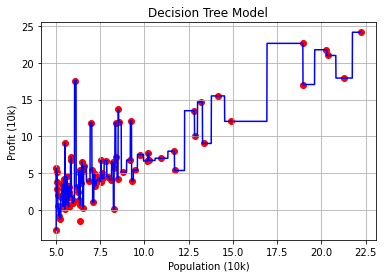

1.0


In [435]:
decisionTreeRegression(X, y)

# Random Forest Regression

In [436]:
def randomForestRegression(X, y):
  from sklearn.ensemble import RandomForestRegressor
  nbEstimators = 500
  RFG = RandomForestRegressor(n_estimators=nbEstimators, random_state=0)
  X = X.reshape(X.shape[0], 1)
  y = y.reshape(y.shape[0], 1)
  RFG.fit(X, y)
  axes = plt.axes()
  axes.grid()
  X_val = np.arange(min(X), max(X), 0.01)
  X_val = X_val.reshape((len(X_val), 1))
  plt.scatter(X, y, color="red")
  plt.plot(X_val, RFG.predict(X_val), color="blue")
  plt.title(f'Random Forest | n_estimators={nbEstimators}')
  plt.xlabel('Population (10k)')
  plt.ylabel('Profit (10k)')
  plt.show()
  print(r2_score(y, RFG.predict(X)))

In [437]:
# randomForestRegression(X, y)

# Scraping

## Intro

In [438]:
import requests

In [439]:
response = requests.get("https://fr.wikipedia.org/wiki/Liste_des_communes_de_France_les_plus_peupl%C3%A9es")
content = response.content
print(content)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Liste des communes de France les plus peupl\xc3\xa9es \xe2\x80\x94 Wikip\xc3\xa9dia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janvier","f\xc3\xa9vrier","mars","avril","mai","juin","juillet","ao\xc3\xbbt","septembre","octobre","novembre","d\xc3\xa9cembre"],"wgRequestId":"X@LWVQpAAEEAABkzqGUAAAAJ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Liste_des_communes_de_France_les_plus_peupl\xc3\xa9es","wgTitle":"Liste des communes de France les plus peupl\xc3\xa9es","wgCurRevisionId":176520453,"wgRevisionId":176520453,"wgArticleId":1542316,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[

## Get elements from web page

In [440]:
from bs4 import BeautifulSoup

In [441]:
parser = BeautifulSoup(content, 'html.parser')
body = parser.body
tbody = body.tbody
# print(tbody)

In [442]:
trs = tbody.find_all('tr')
# print(trs)

In [443]:
# Paris row: trs[2]
tdsC = trs[-1].text
print(tdsC.split("\n"))

['', '273', '54547', 'Vandœuvre-lès-Nancy', 'Meurthe-et-Moselle', '', '--', 'Grand Est', '30\xa0002', '30\xa0569', '31\xa0196', '32\xa0048', '34\xa0105', '33\xa0682', '33\xa0909', '19\xa0686', '']


## Get cities and corresponding populations

In [444]:
cities, population = [], []
for i in range(2, 277):
  cities.append(trs[i].text.split('\n')[3])
  if i==173:
    population.append(trs[i].text.split('\n')[9])
  else:
    population.append(trs[i].text.split("\n")[8])
print(cities)
print(population)

['Paris', 'Marseille', 'Lyon', 'Toulouse', 'Nice', 'Nantes', 'Montpellier', 'Strasbourg', 'Bordeaux', 'Lille', 'Rennes', 'Reims', 'Saint-Étienne', 'Toulon', 'Le Havre', 'Grenoble', 'Dijon', 'Angers', 'Nîmes', 'Saint-Denis', 'Villeurbanne', 'Clermont-Ferrand', 'Le Mans', 'Aix-en-Provence', 'Brest', 'Tours', 'Amiens', 'Limoges', 'Annecy', 'Perpignan', 'Boulogne-Billancourt', 'Orléans', 'Metz', 'Besançon', 'Saint-Denis', 'Argenteuil', 'Rouen', 'Montreuil', 'Mulhouse', 'Caen', 'Saint-Paul', 'Nancy', 'Tourcoing', 'Roubaix', 'Nanterre', 'Nouméa[13]', 'Vitry-sur-Seine', 'Avignon', 'Créteil', 'Poitiers', 'Dunkerque[14]', 'Aubervilliers', 'Versailles', 'Aulnay-sous-Bois', 'Asnières-sur-Seine', 'Colombes', 'Saint-Pierre', 'Courbevoie', 'Fort-de-France', 'Cherbourg-en-Cotentin[15]', 'Le Tampon', 'Rueil-Malmaison', 'Champigny-sur-Marne', 'Béziers', 'Pau', 'La Rochelle', 'Saint-Maur-des-Fossés', 'Calais', 'Cannes', 'Antibes', 'Mamoudzou', 'Drancy', 'Ajaccio', 'Mérignac', 'Saint-Nazaire', 'Colmar', 

In [445]:
# clear lists
if(len(cities)==len(population)):
  for i in range(len(cities)):
    if("[" in cities[i]):
      cities[i] = (cities[i])[0:-4]
    if("(" in population[i]):
      population[i] = (population[i])[0:-7]
print(cities)
print(population)

['Paris', 'Marseille', 'Lyon', 'Toulouse', 'Nice', 'Nantes', 'Montpellier', 'Strasbourg', 'Bordeaux', 'Lille', 'Rennes', 'Reims', 'Saint-Étienne', 'Toulon', 'Le Havre', 'Grenoble', 'Dijon', 'Angers', 'Nîmes', 'Saint-Denis', 'Villeurbanne', 'Clermont-Ferrand', 'Le Mans', 'Aix-en-Provence', 'Brest', 'Tours', 'Amiens', 'Limoges', 'Annecy', 'Perpignan', 'Boulogne-Billancourt', 'Orléans', 'Metz', 'Besançon', 'Saint-Denis', 'Argenteuil', 'Rouen', 'Montreuil', 'Mulhouse', 'Caen', 'Saint-Paul', 'Nancy', 'Tourcoing', 'Roubaix', 'Nanterre', 'Nouméa', 'Vitry-sur-Seine', 'Avignon', 'Créteil', 'Poitiers', 'Dunkerque', 'Aubervilliers', 'Versailles', 'Aulnay-sous-Bois', 'Asnières-sur-Seine', 'Colombes', 'Saint-Pierre', 'Courbevoie', 'Fort-de-France', 'Cherbourg-en-Cotentin', 'Le Tampon', 'Rueil-Malmaison', 'Champigny-sur-Marne', 'Béziers', 'Pau', 'La Rochelle', 'Saint-Maur-des-Fossés', 'Calais', 'Cannes', 'Antibes', 'Mamoudzou', 'Drancy', 'Ajaccio', 'Mérignac', 'Saint-Nazaire', 'Colmar', 'Issy-les-Mo

In [446]:
zip_iterator = zip(cities, population)
final_dict = dict(zip_iterator)
print(final_dict)

{'Paris': '2\xa0187\xa0526', 'Marseille': '863\xa0310', 'Lyon': '516\xa0092', 'Toulouse': '479\xa0553', 'Nice': '340\xa0017', 'Nantes': '309\xa0346', 'Montpellier': '285\xa0121', 'Strasbourg': '280\xa0966', 'Bordeaux': '254\xa0436', 'Lille': '232\xa0787', 'Rennes': '216\xa0815', 'Reims': '182\xa0460', 'Saint-Étienne': '172\xa0565', 'Toulon': '171\xa0953', 'Le Havre': '170\xa0147', 'Grenoble': '158\xa0454', 'Dijon': '156\xa0920', 'Angers': '152\xa0960', 'Nîmes': '150\xa0610', 'Saint-Denis': '111\xa0135', 'Villeurbanne': '147\xa0712', 'Clermont-Ferrand': '143\xa0886', 'Le Mans': '142\xa0946', 'Aix-en-Provence': '142\xa0482', 'Brest': '140\xa0064', 'Tours': '135\xa0787', 'Amiens': '134\xa0057', 'Limoges': '132\xa0175', 'Annecy': '126\xa0924', 'Perpignan': '120\xa0158', 'Boulogne-Billancourt': '120\xa0071', 'Orléans': '116\xa0685', 'Metz': '116\xa0429', 'Besançon': '115\xa0934', 'Argenteuil': '110\xa0210', 'Rouen': '110\xa0145', 'Montreuil': '109\xa0897', 'Mulhouse': '109\xa0443', 'Caen': 

In [447]:
# get population for given city
included=False
desiredCity = input("Which city ?\n")
keys_ = final_dict.keys()
if(desiredCity in keys_):
  included=True
  desiredPop = final_dict[desiredCity]
  print("Pop: "+desiredPop)
else:
  print("Unknown city")

Which city ?
Angers
Pop: 152 960


In [448]:
# transform str number into digits
splittedPop = desiredPop.split()
if(len(splittedPop)==3):
  intPop = int(str(int(splittedPop[0]))+str(int(splittedPop[1]))+str(int(splittedPop[2])))
else:
  intPop = int(str(int(splittedPop[0]))+str(int(splittedPop[1])))
convIntPop = intPop/10000
print("int: "+str(intPop))
print("Converted ML: "+str(convIntPop))

int: 152960
Converted ML: 15.296


## Predict

In [449]:
prediction = DTR.predict([[convIntPop]])
prediction = float(str(prediction)[1:-1])
prediction*=10000
print("Prediction Decision Tree: "+str(desiredCity)+" -> "+str(prediction)+"$")

Prediction Decision Tree: Angers -> 120540.0$


# Interface

In [450]:
# only on foodtruck.py 